# HACK-AI-THON (46_Pandas)

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [3]:
df = pd.read_csv('../data/crop_price_prediction.csv')

In [4]:
# Adding Support Price Values
df['Support Price'] = df['Crop'].map({'ARHAR':6000, 'COTTON':5515, 'GRAM': 5100, 'GROUNDNUT': 5275,
'MAIZE': 1850, 'MOONG': 7196, 'PADDY': 1868, 'RAPESEED AND MUSTARD': 4650, 'SUGARCANE': 275, 'WHEAT': 1975})  

## Read Dataset

In [5]:
df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Support Price
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,6000
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,6000
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,6000
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,6000
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,6000


In [6]:
df.tail()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Support Price
44,SUGARCANE,Tamil Nadu,66335.06,89025.27,85.79,1015.45,275
45,WHEAT,Madhya Pradesh,12464.40,22489.75,810.25,23.59,1975
46,WHEAT,Punjab,17945.58,35423.48,804.80,39.83,1975
47,WHEAT,Uttar Pradesh,18979.38,31902.74,769.84,34.99,1975
48,WHEAT,Rajasthan,19119.08,29876.36,683.58,37.19,1975


In [7]:
df.size

343

In [8]:
df.shape

(49, 7)

In [9]:
df.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ',
       'Support Price'],
      dtype='object')

In [10]:
df.dtypes

Crop                                      object
State                                     object
Cost of Cultivation (`/Hectare) A2+FL    float64
Cost of Cultivation (`/Hectare) C2       float64
Cost of Production (`/Quintal) C2        float64
Yield (Quintal/ Hectare)                 float64
Support Price                              int64
dtype: object

In [11]:
df.duplicated().sum()


0

## Check Null and NA values

In [12]:
df.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
Support Price                            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
 6   Support Price                          49 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8+ KB


In [14]:
df.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Support Price
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735,4011.122449
std,13561.435306,20095.783569,1104.990472,245.293123,2191.142269
min,5483.540000,7868.640000,85.790000,1.320000,275.000000
25%,12774.410000,19259.840000,732.620000,9.590000,1868.000000
50%,17022.000000,25909.050000,1595.560000,13.700000,5100.000000
75%,24731.060000,35423.480000,2228.970000,36.610000,5515.000000
max,66335.060000,91442.630000,5777.480000,1015.450000,7196.000000


In [15]:
df.nunique()

Crop                                     10
State                                    13
Cost of Cultivation (`/Hectare) A2+FL    49
Cost of Cultivation (`/Hectare) C2       49
Cost of Production (`/Quintal) C2        49
Yield (Quintal/ Hectare)                 49
Support Price                            10
dtype: int64

## Data Visualization


In [16]:
ARHAR=df[0:5]
COTTON=df[6:10]
GRAM=df[10:15]
GROUNDNUT=df[15:20]
MAIZE=df[20:25]
MOONG=df[25:30]
PADDY=df[30:36]
RAPESEEDAndMUSTARD=df[35:40]
SUGARCANE=df[40:45]
WHEAT=df[46:49]

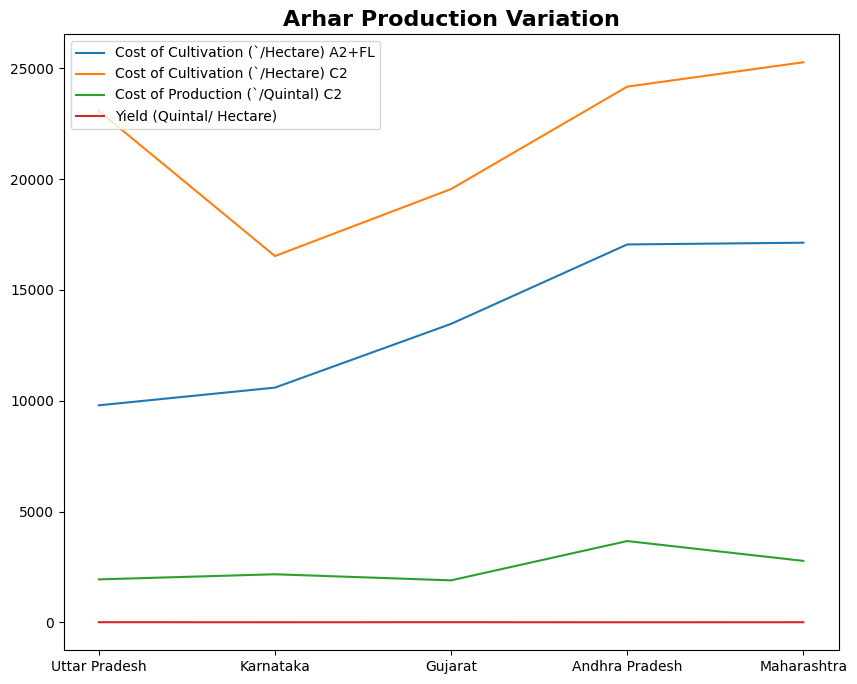

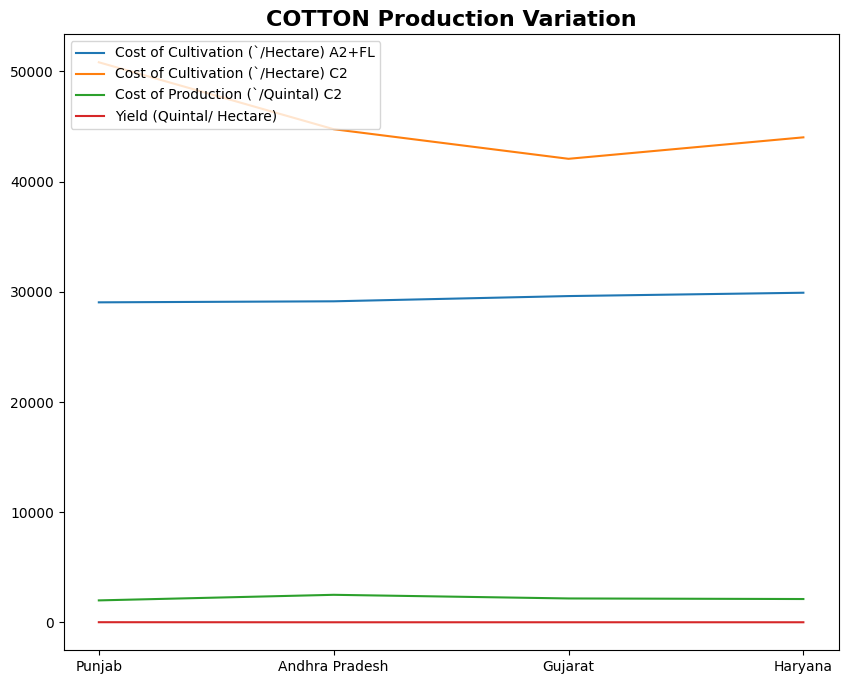

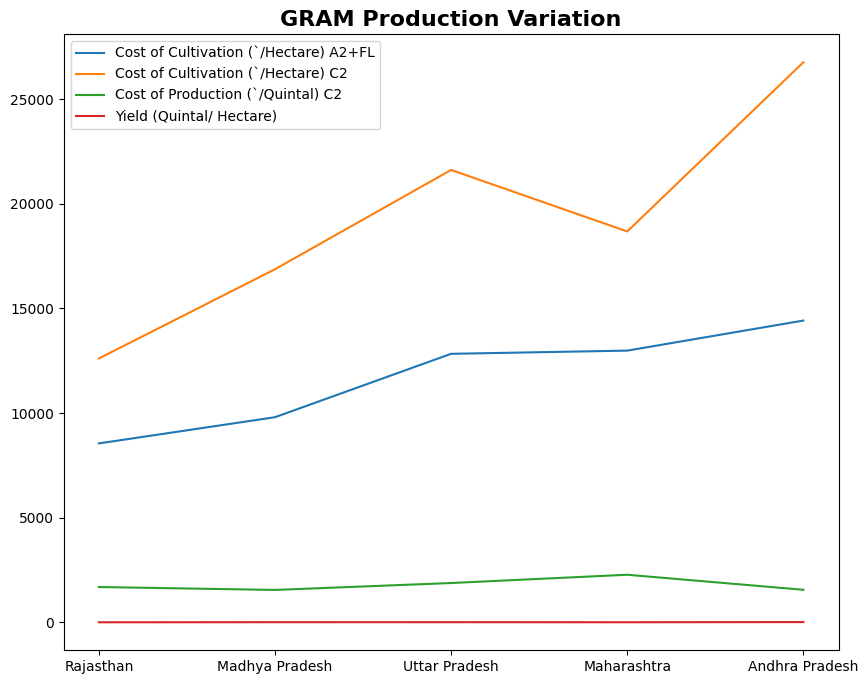

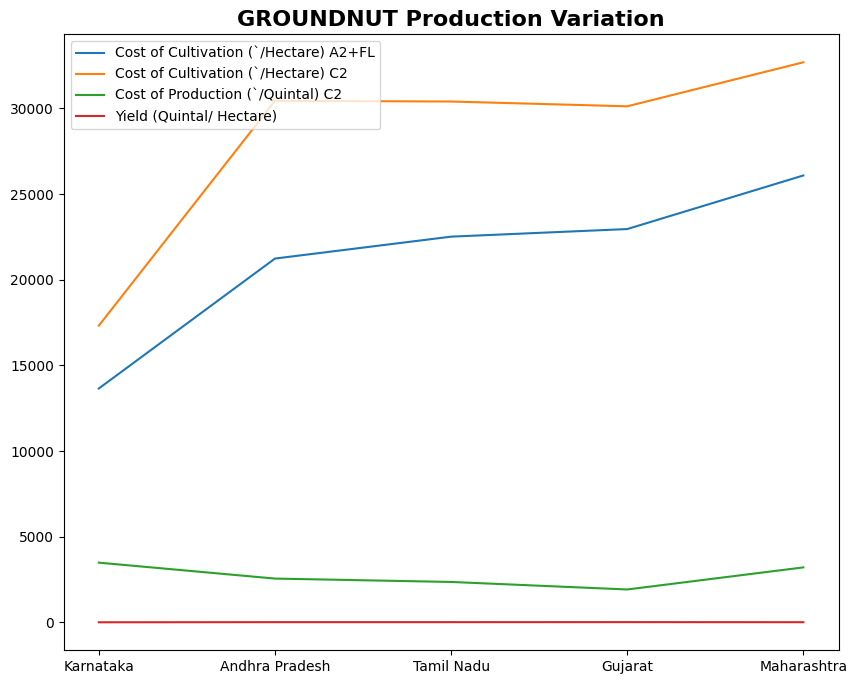

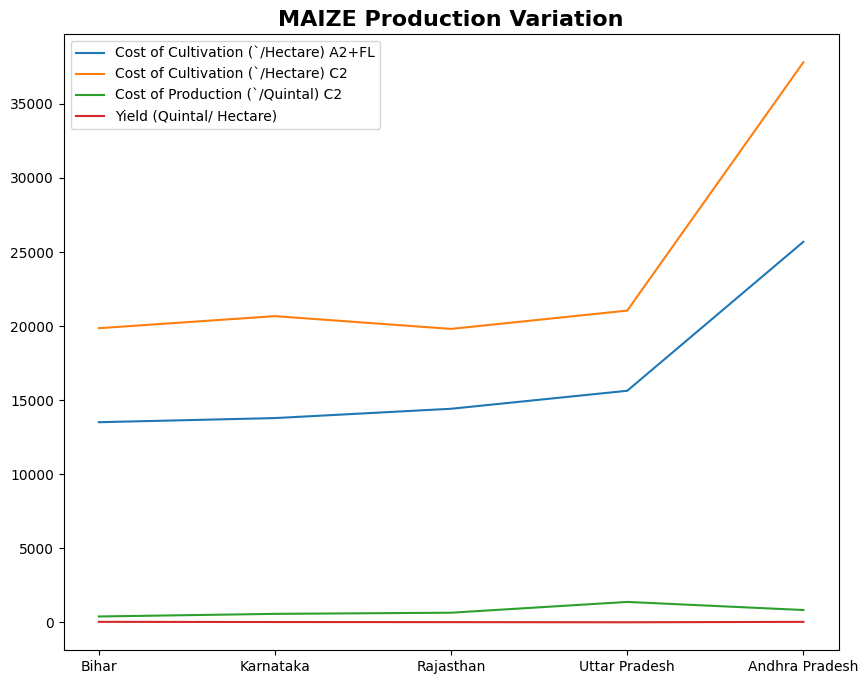

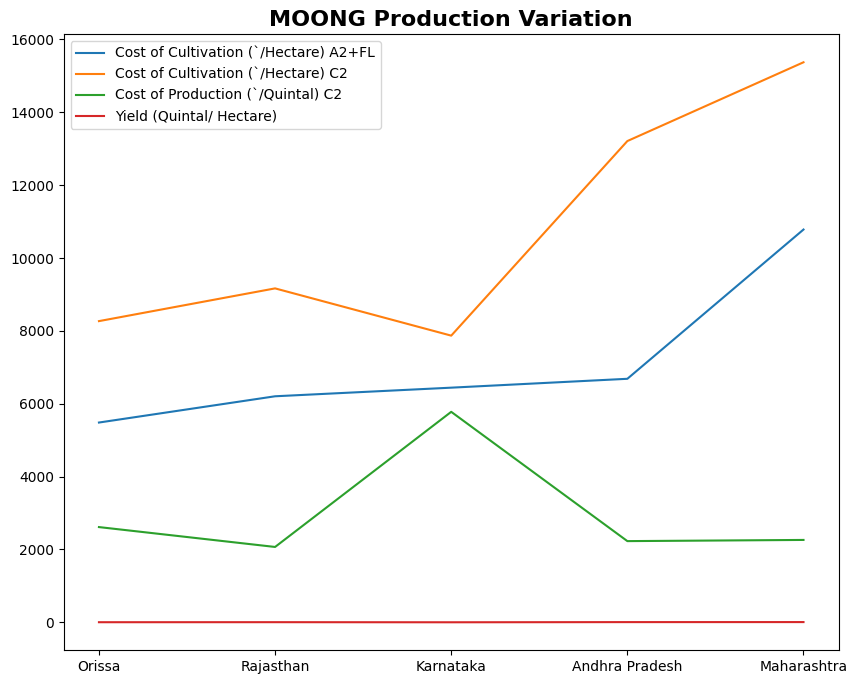

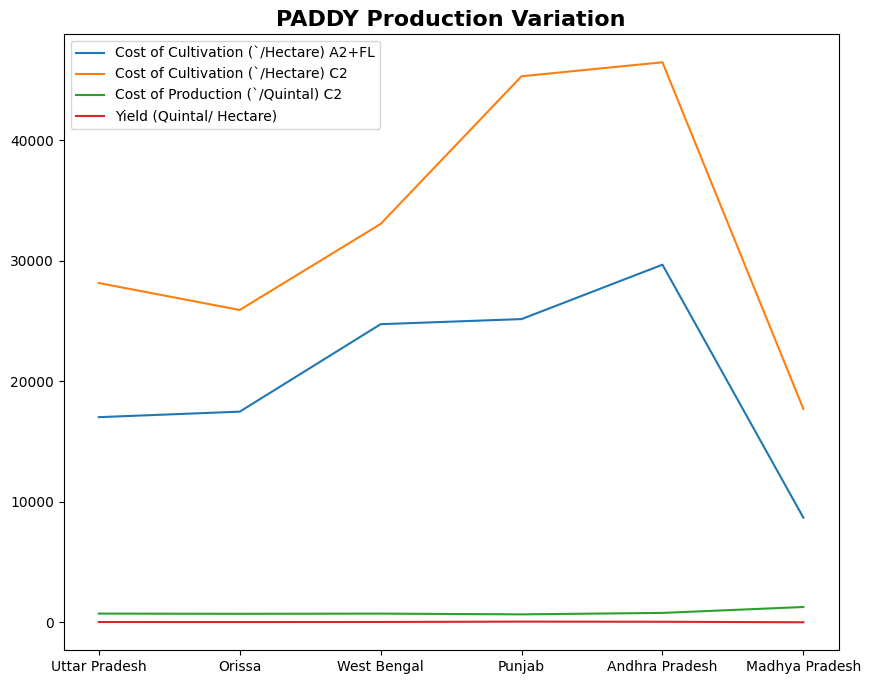

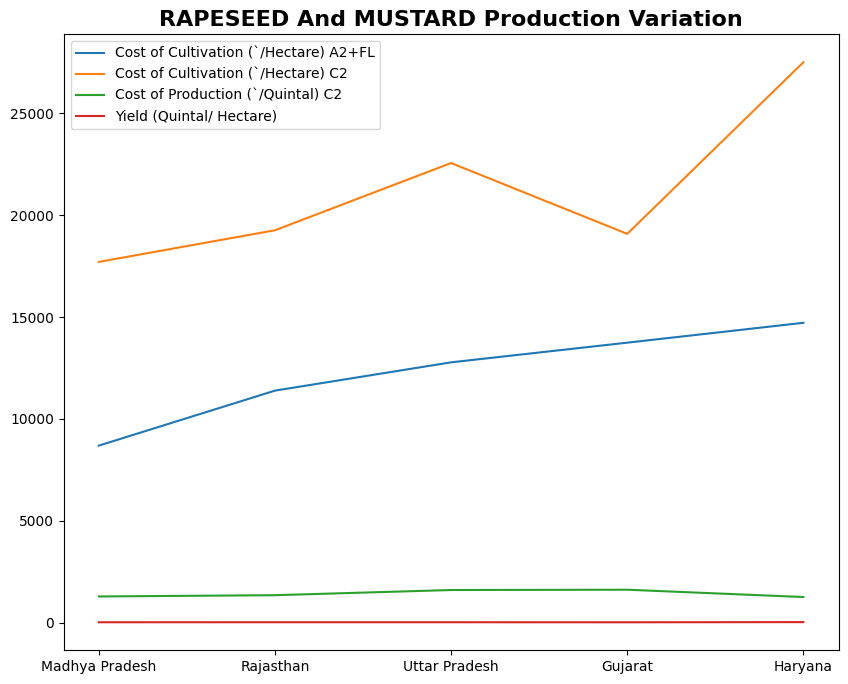

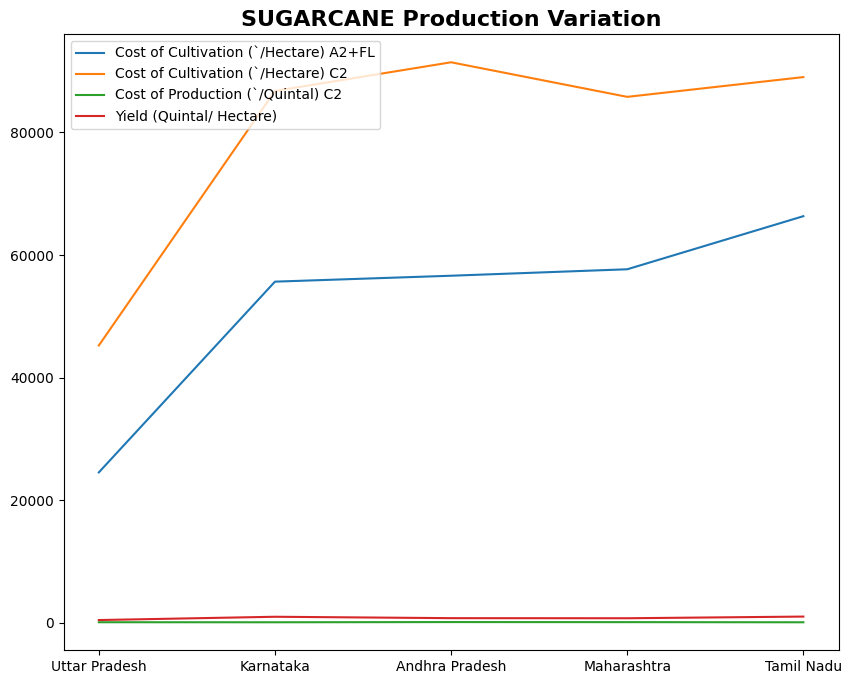

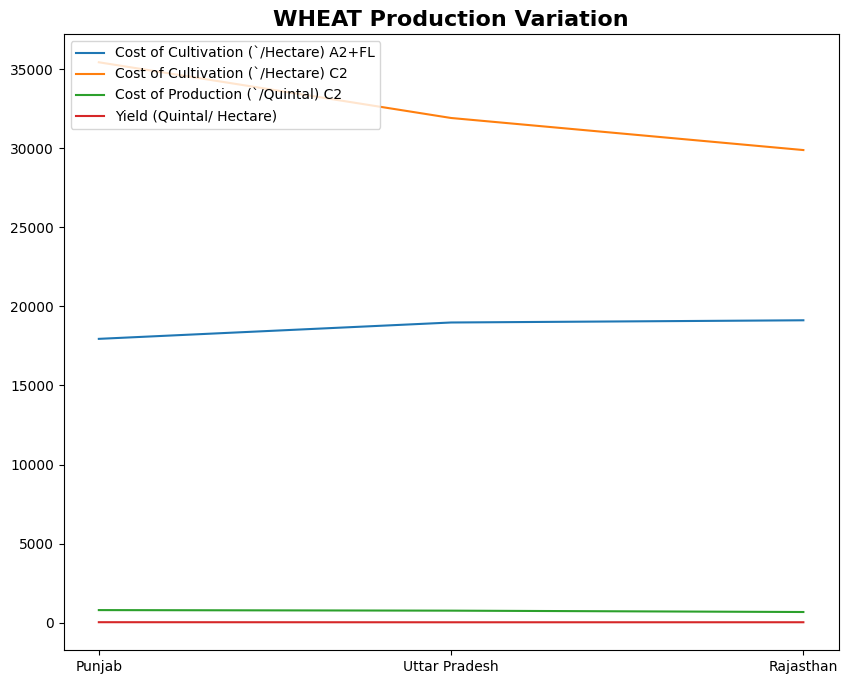

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

x=ARHAR['State']
y=ARHAR['Cost of Cultivation (`/Hectare) A2+FL']
z=ARHAR['Cost of Cultivation (`/Hectare) C2']
a=ARHAR['Cost of Production (`/Quintal) C2']
b=ARHAR['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("Arhar Production Variation", fontsize=16, fontweight='bold')
plt.show()


plt.figure(figsize=(10,8))
x=COTTON['State']
y=COTTON['Cost of Cultivation (`/Hectare) A2+FL']
z=COTTON['Cost of Cultivation (`/Hectare) C2']
a=COTTON['Cost of Production (`/Quintal) C2']
b=COTTON['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("COTTON Production Variation", fontsize=16, fontweight='bold')
plt.show()



plt.figure(figsize=(10,8))
x=GRAM['State']
y=GRAM['Cost of Cultivation (`/Hectare) A2+FL']
z=GRAM['Cost of Cultivation (`/Hectare) C2']
a=GRAM['Cost of Production (`/Quintal) C2']
b=GRAM['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("GRAM Production Variation", fontsize=16, fontweight='bold')
plt.show()




plt.figure(figsize=(10,8))
x=GROUNDNUT['State']
y=GROUNDNUT['Cost of Cultivation (`/Hectare) A2+FL']
z=GROUNDNUT['Cost of Cultivation (`/Hectare) C2']
a=GROUNDNUT['Cost of Production (`/Quintal) C2']
b=GROUNDNUT['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("GROUNDNUT Production Variation", fontsize=16, fontweight='bold')
plt.show()




plt.figure(figsize=(10,8))
x=MAIZE['State']
y=MAIZE['Cost of Cultivation (`/Hectare) A2+FL']
z=MAIZE['Cost of Cultivation (`/Hectare) C2']
a=MAIZE['Cost of Production (`/Quintal) C2']
b=MAIZE['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("MAIZE Production Variation", fontsize=16, fontweight='bold')
plt.show()



plt.figure(figsize=(10,8))
x=MOONG['State']
y=MOONG['Cost of Cultivation (`/Hectare) A2+FL']
z=MOONG['Cost of Cultivation (`/Hectare) C2']
a=MOONG['Cost of Production (`/Quintal) C2']
b=MOONG['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("MOONG Production Variation", fontsize=16, fontweight='bold')
plt.show()



plt.figure(figsize=(10,8))
x=PADDY['State']
y=PADDY['Cost of Cultivation (`/Hectare) A2+FL']
z=PADDY['Cost of Cultivation (`/Hectare) C2']
a=PADDY['Cost of Production (`/Quintal) C2']
b=PADDY['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("PADDY Production Variation", fontsize=16, fontweight='bold')
plt.show()


plt.figure(figsize=(10,8))
x=RAPESEEDAndMUSTARD['State']
y=RAPESEEDAndMUSTARD['Cost of Cultivation (`/Hectare) A2+FL']
z=RAPESEEDAndMUSTARD['Cost of Cultivation (`/Hectare) C2']
a=RAPESEEDAndMUSTARD['Cost of Production (`/Quintal) C2']
b=RAPESEEDAndMUSTARD['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("RAPESEED And MUSTARD Production Variation", fontsize=16, fontweight='bold')
plt.show()

plt.figure(figsize=(10,8))
x=SUGARCANE['State']
y=SUGARCANE['Cost of Cultivation (`/Hectare) A2+FL']
z=SUGARCANE['Cost of Cultivation (`/Hectare) C2']
a=SUGARCANE['Cost of Production (`/Quintal) C2']
b=SUGARCANE['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("SUGARCANE Production Variation", fontsize=16, fontweight='bold')
plt.show()

plt.figure(figsize=(10,8))
x=WHEAT['State']
y=WHEAT['Cost of Cultivation (`/Hectare) A2+FL']
z=WHEAT['Cost of Cultivation (`/Hectare) C2']
a=WHEAT['Cost of Production (`/Quintal) C2']
b=WHEAT['Yield (Quintal/ Hectare) ']
plt.plot(x,y,label="Cost of Cultivation (`/Hectare) A2+FL")
plt.plot(x,z,label="Cost of Cultivation (`/Hectare) C2")
plt.plot(x,a,label="Cost of Production (`/Quintal) C2")
plt.plot(x,b,label="Yield (Quintal/ Hectare)")
plt.legend(loc="upper left")
plt.title("WHEAT Production Variation", fontsize=16, fontweight='bold')
plt.show()

<AxesSubplot: xlabel='State'>

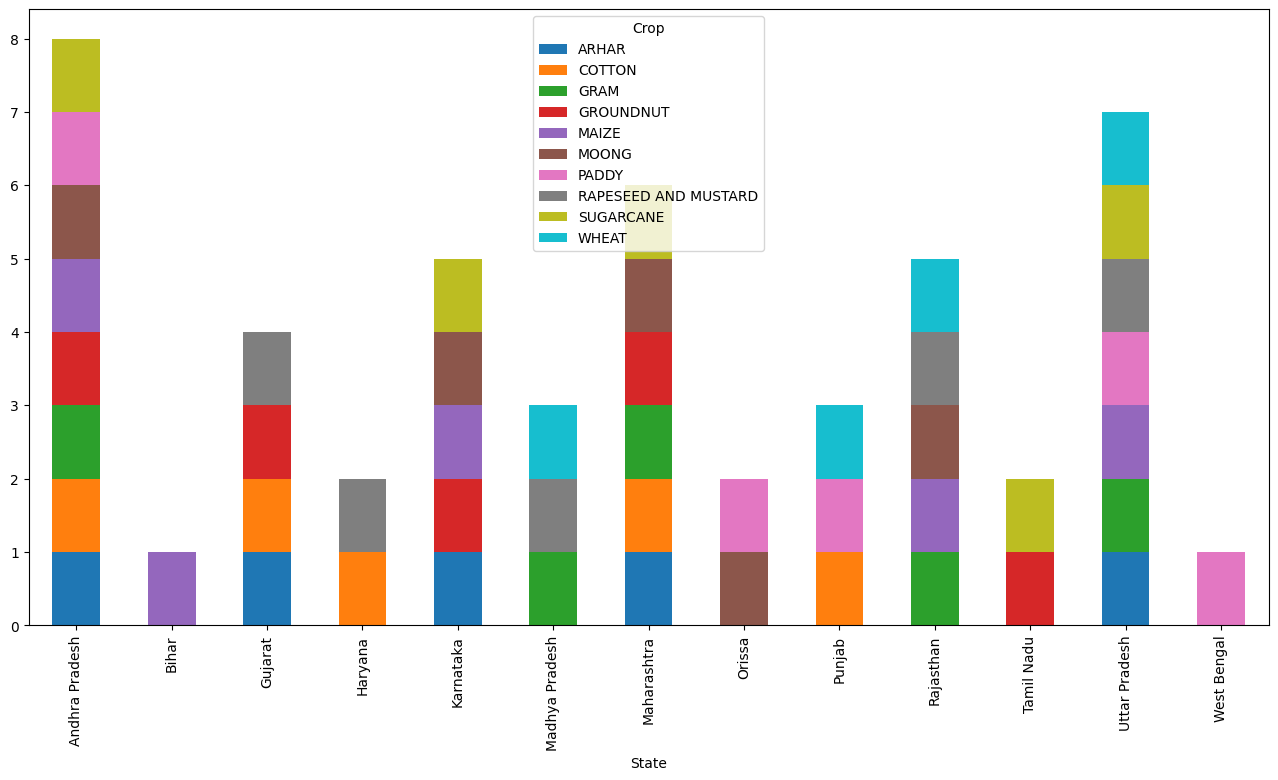

In [18]:
temp1 = pd.crosstab(df['State'], df['Crop'])
temp1.plot(kind='bar', stacked=True, figsize = (16,8))

In [19]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls
from collections import Counter # To do counter of some features


def Plot_PieChart(str1, str_yield, str_cultivation_cost, str_production_cost, title):
    
    yield_crop = df.groupby(str1)[str_yield].sum().to_frame().reset_index()
    cultivation = df.groupby(str1)[str_cultivation_cost].sum().to_frame().reset_index()
    production = df.groupby(str1)[str_production_cost].sum().to_frame().reset_index()

    colors = None
    trace0 = go.Pie(labels=yield_crop[str1], values=yield_crop[str_yield],
                    domain= {'x': [0, .30]}, marker=dict(colors=colors))
    trace1 = go.Pie(labels=cultivation[str1], values=cultivation[str_cultivation_cost],
                    domain= {'x': [0.35, .65]}, marker=dict(colors=colors))
    trace2 = go.Pie(labels=production[str1], values=production[str_production_cost],
                    domain= {'x': [0.70, 1]}, marker=dict(colors=colors))
    layout = dict(title= title, 
                  font=dict(family='Courier New, monospace', size=9, color='#7f7f7f'),
                  height=400, width=800,)
    fig = dict(data=[trace0, trace1, trace2], layout=layout)
    iplot(fig)

In [20]:
str1 = 'Crop'
str_yield = 'Yield (Quintal/ Hectare) '
str_cultivation_cost = 'Cost of Cultivation (`/Hectare) C2'
str_production_cost = 'Cost of Production (`/Quintal) C2'
title = 'Cropwise Yield(Quintal/Hectare), Cultivation_Cost(Hectare) and Production_Cost(/Quintal) in India'
Plot_PieChart(str1, str_yield, str_cultivation_cost, str_production_cost, title)

In [21]:
str1 = 'State'
str_yield = 'Yield (Quintal/ Hectare) '
str_cultivation_cost = 'Cost of Cultivation (`/Hectare) C2'
str_production_cost = 'Cost of Production (`/Quintal) C2'
title = 'Statewise Yield(Quintal/Hectare), Cultivation_Cost(Hectare) and Production_Cost(/Quintal) in India'
Plot_PieChart(str1, str_yield, str_cultivation_cost, str_production_cost, title)

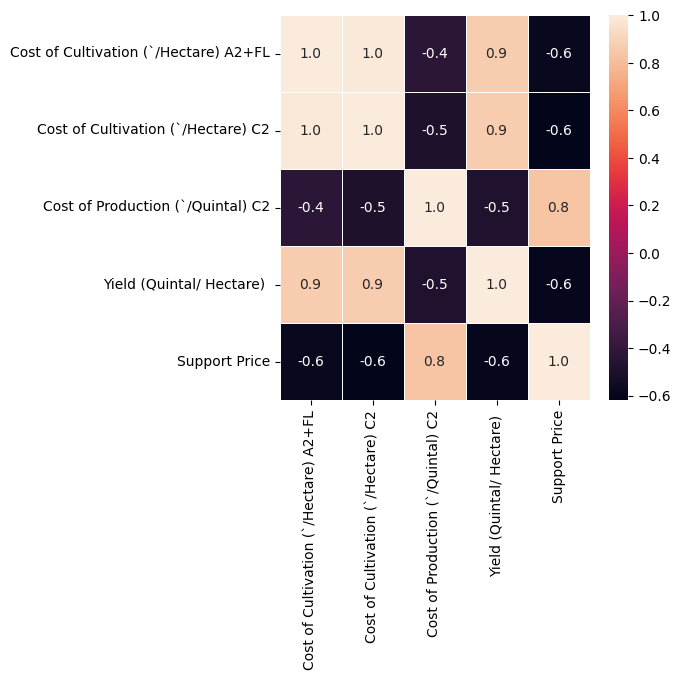

In [22]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
#preprocessing
Profit = (df.iloc[:,5]*df.iloc[:,6]-(df.iloc[:,2]+df.iloc[:,3]+(df.iloc[:,5]*df.iloc[:,4]))).values
Profit = Profit.reshape(49,1)
Profitcopy = (df.iloc[:,5]*df.iloc[:,6]-(df.iloc[:,2]+df.iloc[:,3]+(df.iloc[:,5]*df.iloc[:,4]))).values

In [25]:
for i in range (0,49):
    if Profit[i][0]>0:
        Profit[i][0] = 1
    else:
        Profit[i][0] = 0

In [26]:
X = df[['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ', 'Support Price']].values

In [27]:
#label encoder to categorical data 
from sklearn.preprocessing import LabelEncoder
labelencoder_X = preprocessing.LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:, 0])
X[:,1] = labelencoder_X.fit_transform(X[:, 1])

In [28]:
#One hot encoder 
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder='passthrough')
x2 = np.array(columnTransformer.fit_transform(X), dtype = np.float)

In [29]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),[10])], remainder='passthrough')
x3 = np.array(columnTransformer.fit_transform(x2), dtype = np.float)

In [30]:
#output col in y 
y = Profit

In [31]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=3)

## Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

dtc = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=2)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test,dtc_pred)
acc.append(dtc_acc) 
model.append('Decision Tree Classifier')

print('Decision Tree Classifier Accuracy: ',dtc_acc)
print(classification_report(y_test,dtc_pred))

Decision Tree Classifier Accuracy:  0.8
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [35]:
#cross validation
from sklearn.model_selection import cross_val_score
dtc_cv = cross_val_score(dtc,X,y,cv=5)
print('Decision Tree Classifier Cross Validation Score: ',dtc_cv.mean())

Decision Tree Classifier Cross Validation Score:  0.5911111111111111


In [36]:
#cross validation score 
from sklearn.model_selection import cross_val_score
dtc_cv = cross_val_score(dtc,X,y,cv=5)
dtc_cv

array([0.9       , 0.7       , 0.4       , 0.4       , 0.55555556])

In [37]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=2)

## Logistic Regression

In [38]:

#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test,lr_pred)
acc.append(lr_acc)
model.append('Logistic Regression')

print('Logistic Regression Accuracy: ',lr_acc)
print(classification_report(y_test,lr_pred))

Logistic Regression Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [39]:
#cross validation
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(lr,X,y,cv=5)
print('Logistic Regression Cross Validation Score: ',lr_cv.mean())

Logistic Regression Cross Validation Score:  0.8733333333333333


In [40]:
#cross validation score
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(lr,X,y,cv=5)
lr_cv

array([1.        , 1.        , 0.8       , 0.9       , 0.66666667])

## Support Vector Machine

In [41]:
#svc classifier
from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=2)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test,svc_pred)
acc.append(svc_acc)
model.append('SVC Classifier')
print('SVC Classifier Accuracy: ',svc_acc)
print(classification_report(y_test,svc_pred))

SVC Classifier Accuracy:  0.8666666666666667
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         8
         1.0       1.00      0.71      0.83         7

    accuracy                           0.87        15
   macro avg       0.90      0.86      0.86        15
weighted avg       0.89      0.87      0.86        15



In [42]:
#cross validation
from sklearn.model_selection import cross_val_score
svc_cv = cross_val_score(svc,X,y,cv=5)
print('SVC Classifier Cross Validation Score: ',svc_cv.mean())
svc_cv 

SVC Classifier Cross Validation Score:  0.8733333333333333


array([1.        , 1.        , 0.8       , 0.9       , 0.66666667])

In [43]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=2)

## XGBoost Classifier

In [44]:
#xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=5, learning_rate=0.01, n_estimators=1000)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test,xgb_pred)
acc.append(xgb_acc)
model.append('XGBoost Classifier')
print('XGBoost Classifier Accuracy: ',xgb_acc)

XGBoost Classifier Accuracy:  0.8


## Accuracy Comparison

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

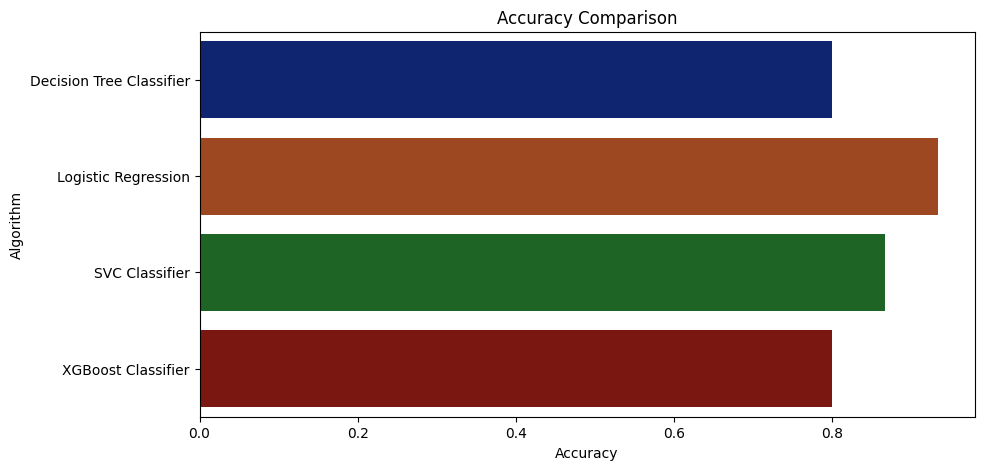

In [45]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [46]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree Classifier --> 0.8
Logistic Regression --> 0.9333333333333333
SVC Classifier --> 0.8666666666666667
XGBoost Classifier --> 0.8
